In [702]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [704]:
df = pd.read_csv('/Users/sahilanjum/Downloads/Bus_Breakdown_and_Delays_20251015.csv', low_memory=False)

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219491 entries, 0 to 1219490
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   School_Year                      1219490 non-null  object
 1   Busbreakdown_ID                  1219491 non-null  int64 
 2   Run_Type                         1219466 non-null  object
 3   Bus_No                           1219431 non-null  object
 4   Route_Number                     1219356 non-null  object
 5   Reason                           1075187 non-null  object
 6   Schools_Serviced                 1215862 non-null  object
 7   Occurred_On                      1219490 non-null  object
 8   Created_On                       1219490 non-null  object
 9   Boro                             1195419 non-null  object
 10  Bus_Company_Name                 1215999 non-null  object
 11  How_Long_Delayed                 1043680 non-null  object
 12  

In [706]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [707]:
all_duplicates = df[df.duplicated(keep=False)]
all_duplicates

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK


In [708]:
df.isnull().sum()

School_Year                              1
Busbreakdown_ID                          0
Run_Type                                25
Bus_No                                  60
Route_Number                           135
Reason                              144304
Schools_Serviced                      3629
Occurred_On                              1
Created_On                               1
Boro                                 24072
Bus_Company_Name                      3492
How_Long_Delayed                    175811
Number_Of_Students_On_The_Bus           71
Has_Contractor_Notified_Schools          0
Has_Contractor_Notified_Parents          0
Have_You_Alerted_OPT                     0
Informed_On                              1
Incident_Number                    1207049
Last_Updated_On                          1
Breakdown_or_Running_Late                0
School_Age_or_PreK                       0
dtype: int64

In [709]:
df.head(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1272996,Special Ed AM Run,2256,K355,Won`t Start,15879,06/03/2016 06:03:00 AM,06/03/2016 06:05:00 AM,Brooklyn,...,NaN,0,Yes,Yes,Yes,06/03/2016 06:05:00 AM,NaN,06/03/2016 06:05:05 AM,Breakdown,School-Age
1,2016-2017,1313907,Special Ed AM Run,4481,K002,Won`t Start,22001,01/10/2017 05:55:00 AM,01/10/2017 05:57:00 AM,Brooklyn,...,30min,0,Yes,Yes,No,01/10/2017 05:57:00 AM,NaN,01/10/2017 05:57:42 AM,Running Late,School-Age
2,2015-2016,1267391,Special Ed AM Run,GT2114,Y925,Won`t Start,11012,05/11/2016 05:50:00 AM,05/11/2016 05:59:00 AM,Bronx,...,30 MIN,0,Yes,Yes,Yes,05/11/2016 05:59:00 AM,NaN,05/11/2016 05:59:42 AM,Running Late,School-Age
3,2016-2017,1312240,General Ed AM Run,2436,K1546,Other,15032,01/05/2017 06:00:00 AM,01/05/2017 06:05:00 AM,Brooklyn,...,20 MINS,0,No,No,No,01/05/2017 06:05:00 AM,NaN,01/05/2017 06:05:48 AM,Running Late,School-Age
4,2016-2017,1312351,Special Ed AM Run,5814D,X441,Mechanical Problem,11002,01/05/2017 06:45:00 AM,01/05/2017 06:54:00 AM,Bronx,...,NaN,0,Yes,Yes,No,01/05/2017 06:54:00 AM,NaN,01/05/2017 10:50:02 AM,Breakdown,School-Age


In [710]:
df.nunique()

School_Year                             32
Busbreakdown_ID                    1219491
Run_Type                                10
Bus_No                               30832
Route_Number                         22820
Reason                                  10
Schools_Serviced                     60047
Occurred_On                         547925
Created_On                          665317
Boro                                    12
Bus_Company_Name                      1012
How_Long_Delayed                      5584
Number_Of_Students_On_The_Bus          582
Has_Contractor_Notified_Schools          2
Has_Contractor_Notified_Parents          2
Have_You_Alerted_OPT                     2
Informed_On                         665317
Incident_Number                       9250
Last_Updated_On                     629796
Breakdown_or_Running_Late                2
School_Age_or_PreK                       2
dtype: int64

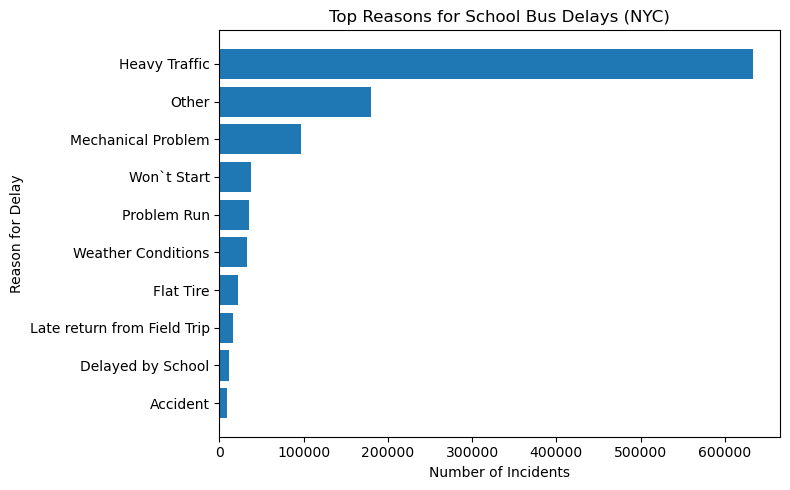

In [711]:
reason_counts = df['Reason'].value_counts().head(10)   # Top 10 reasons

# Create the horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(reason_counts.index, reason_counts.values)
plt.xlabel("Number of Incidents")
plt.ylabel("Reason for Delay")
plt.title("Top Reasons for School Bus Delays (NYC)")
plt.gca().invert_yaxis()  # So the highest bar appears on top
plt.tight_layout()

# Save the figure (use PNG for PowerPoint)
plt.savefig("reason_counts.png", dpi=300, bbox_inches='tight')
plt.show()

In [712]:
df['Incident_Number'].unique()

array([nan, '4', '1792427', ..., '1726788', 'INC1728327', 'INC1753273'],
      dtype=object)

In [713]:
df = df.drop('Incident_Number', axis=1)
df = df.drop('Informed_On', axis=1)

Have_You_Alerted_OPT
No     99.914089
Yes     0.085911
Name: proportion, dtype: float64


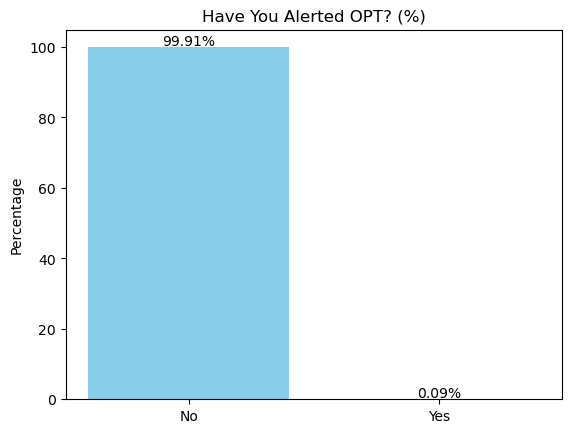

In [714]:
mask = df['Bus_Company_Name'].isna() 
proportion = df.loc[mask, 'Have_You_Alerted_OPT'].value_counts(normalize=True) * 100
print(proportion)

plt.bar(proportion.index, proportion.values, color=['skyblue', 'lightcoral'])
plt.title('Have You Alerted OPT? (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for i, v in enumerate(proportion.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()

In [715]:
df['How_Long_Delayed'].isna().mean() * 100 
df.loc[df['How_Long_Delayed'].isna(), 'Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
Breakdown       156476
Running Late     19335
Name: count, dtype: int64

In [716]:
df[['Breakdown_or_Running_Late']].value_counts()

Breakdown_or_Running_Late
Running Late                 1062973
Breakdown                     156518
Name: count, dtype: int64

In [717]:
df.isnull().sum()

School_Year                             1
Busbreakdown_ID                         0
Run_Type                               25
Bus_No                                 60
Route_Number                          135
Reason                             144304
Schools_Serviced                     3629
Occurred_On                             1
Created_On                              1
Boro                                24072
Bus_Company_Name                     3492
How_Long_Delayed                   175811
Number_Of_Students_On_The_Bus          71
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Last_Updated_On                         1
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [718]:
df = df.dropna(subset=['School_Year',
'Busbreakdown_ID',
'Run_Type',
'Bus_No',
'Route_Number',
'Number_Of_Students_On_The_Bus',
'Schools_Serviced',
'Bus_Company_Name',
'How_Long_Delayed'])

In [719]:
df = df[df['Breakdown_or_Running_Late'] == 'Running Late']

In [720]:
df['Reason'].value_counts()

Reason
Heavy Traffic                  626924
Other                          163756
Mechanical Problem              44251
Problem Run                     35087
Weather Conditions              31429
Late return from Field Trip     15679
Won`t Start                     11411
Delayed by School               10566
Flat Tire                       10055
Accident                         8259
Name: count, dtype: int64

In [721]:
df.loc[
    (df['Breakdown_or_Running_Late'] == 'Running Late') & (df['Reason'].isna()),
    'Reason'
] = 'Other'


In [722]:
import numpy as np

df['Boro'] = df.groupby('Route_Number')['Boro'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)
df['Boro'] = df.groupby('Bus_Company_Name')['Boro'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

/var/folders/9v/cvqbc0p16l718bpl8kw22q680000gn/T/ipykernel_18121/648396859.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)


In [723]:
df.isnull().sum()

School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [724]:
df[['How_Long_Delayed']].value_counts().sample(10)

How_Long_Delayed
7min                12
25--min              1
10-15 mns.           1
10- 15 min           2
10  MINTS            5
60-120MINS           1
9918                 1
30-45 AM             1
9906                 1
15 mn                9
Name: count, dtype: int64

Values covering 95% of data: 183
Values covering 97% of data: 290
Values covering 99% of data: 814


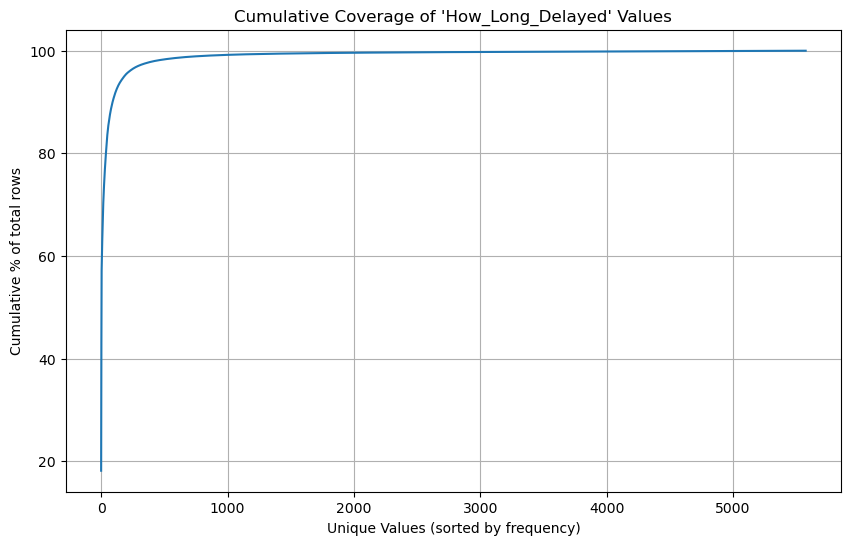

In [725]:
vc = df['How_Long_Delayed'].value_counts()
freq_df = vc.reset_index()
freq_df.columns = ['How_Long_Delayed', 'Count']
freq_df['Cumulative_Count'] = freq_df['Count'].cumsum()
freq_df['Cumulative_Percentage'] = 100 * freq_df['Cumulative_Count'] / freq_df['Count'].sum()

cutoff_95 = freq_df[freq_df['Cumulative_Percentage'] <= 95].shape[0]
cutoff_97 = freq_df[freq_df['Cumulative_Percentage'] <= 97].shape[0]
cutoff_99 = freq_df[freq_df['Cumulative_Percentage'] <= 99].shape[0]

print(f"Values covering 95% of data: {cutoff_95}")
print(f"Values covering 97% of data: {cutoff_97}")
print(f"Values covering 99% of data: {cutoff_99}")

plt.figure(figsize=(10,6))
plt.plot(freq_df['Cumulative_Percentage'])
plt.title("Cumulative Coverage of 'How_Long_Delayed' Values")
plt.xlabel("Unique Values (sorted by frequency)")
plt.ylabel("Cumulative % of total rows")
plt.grid(True)

plt.savefig("cumulative_coverage.png", dpi=300, bbox_inches='tight')
plt.show()




In [726]:

top_n = 400
keep_values = df['How_Long_Delayed'].value_counts().head(top_n).index

df = df[df['How_Long_Delayed'].isin(keep_values)].copy()


In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021165 entries, 1 to 1219490
Data columns (total 19 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   School_Year                      1021165 non-null  object
 1   Busbreakdown_ID                  1021165 non-null  int64 
 2   Run_Type                         1021165 non-null  object
 3   Bus_No                           1021165 non-null  object
 4   Route_Number                     1021165 non-null  object
 5   Reason                           1021165 non-null  object
 6   Schools_Serviced                 1021165 non-null  object
 7   Occurred_On                      1021165 non-null  object
 8   Created_On                       1021165 non-null  object
 9   Boro                             1021165 non-null  object
 10  Bus_Company_Name                 1021165 non-null  object
 11  How_Long_Delayed                 1021165 non-null  object
 12  Numbe

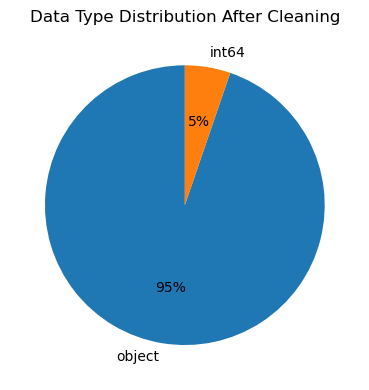

In [728]:
dtype_counts = df.dtypes.value_counts()
plt.figure(figsize=(4,4))
plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.0f%%', startangle=90)
plt.title("Data Type Distribution After Cleaning")
plt.tight_layout()
plt.savefig("dtype_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [729]:
def convert_to_minutes(value):
    if pd.isna(value):
        return np.nan

    val = str(value).strip().lower()

    if re.match(r"^\.\d+$", val):
        return float(val.replace(".", ""))

    if "half" in val or "1/2" in val:
        return 30

    hr_match = re.search(r"(\d+(\.\d+)?)(\s*)(hr|hour|hours|hrs|h)\b", val)
    if hr_match:
        hours = float(hr_match.group(1))
        return hours * 60

    range_match = re.findall(r"(\d+)\s*[-/to]+\s*(\d+)", val)
    if range_match:
        nums = list(map(float, range_match[0]))
        return np.mean(nums)

    min_match = re.search(r"(\d+(\.\d+)?)\s*(min|mins|minutes|mnts|mnt|mns|miuntes|mints)?\b", val)
    if min_match:
        return float(min_match.group(1))

    pure_num = re.match(r"^\d+$", val)
    if pure_num:
        return float(val)

    combo_match = re.search(r"(\d+)\s*(hr|hour|hours)\s*(\d+)\s*(min|minutes)?", val)
    if combo_match:
        hours = float(combo_match.group(1))
        minutes = float(combo_match.group(3))
        return hours * 60 + minutes

    return float(30)

df['Delay_Minutes'] = df['How_Long_Delayed'].apply(convert_to_minutes)



In [730]:
df[['How_Long_Delayed', 'Delay_Minutes']].value_counts()

How_Long_Delayed  Delay_Minutes
16-30 Min         23.0             189151
31-45 Min         38.0             166711
46-60 Min         53.0              93241
61-90 Min         75.5              79731
0-15 Min          7.5               67392
                                    ...  
20 Mins.          20.0                 63
45 miuntes        45.0                 62
12 MIN            12.0                 61
2 hours           120.0                61
25-30MIN          27.5                 60
Name: count, Length: 400, dtype: int64

In [731]:
len(df[['Delay_Minutes']].value_counts())

42

In [732]:
print(df['School_Year'].unique())

['2016-2017' '2015-2016' '2025-2026' '2006-2007' '2007-2008' '2008-2009'
 '2009-2010' '2010-2011' '2011-2012' '2012-2013' '2013-2014' '2014-2015'
 '2017-2018' '2018-2019' '2019-2020' '2020-2021' '2021-2022' '2022-2023'
 '2023-2024' '2024-2025' '2000-2001' '2001-2002' '2002-2003' '2003-2004'
 '2004-2005' '2005-2006']


In [733]:
df[['School_Year']].value_counts()

School_Year
2018-2019      102649
2022-2023       94283
2023-2024       83571
2017-2018       79270
2024-2025       71551
2021-2022       69271
2016-2017       68397
2019-2020       65714
2014-2015       56720
2015-2016       53771
2010-2011       43884
2013-2014       43788
2011-2012       43007
2012-2013       34163
2009-2010       24276
2008-2009       22878
2020-2021       18505
2025-2026       14244
2007-2008       13756
2006-2007        6496
2004-2005        3387
2005-2006        3277
2003-2004        1836
2002-2003        1440
2001-2002        1007
2000-2001          24
Name: count, dtype: int64

In [735]:
df['School_Year'] = df['School_Year'].str[:4].astype(int)

In [736]:
print(df['School_Year'].nunique())

26


In [737]:
df[['School_Year']].value_counts()

School_Year
2018           102649
2022            94283
2023            83571
2017            79270
2024            71551
2021            69271
2016            68397
2019            65714
2014            56720
2015            53771
2010            43884
2013            43788
2011            43007
2012            34163
2009            24276
2008            22878
2020            18505
2025            14244
2007            13756
2006             6496
2004             3387
2005             3277
2003             1836
2002             1440
2001             1007
2000               24
Name: count, dtype: int64

In [738]:
df[['Boro', 'Reason', 'Run_Type']].nunique()

Boro        12
Reason      10
Run_Type    10
dtype: int64

In [741]:
print(df['Boro'].unique())
print(df['Boro'].value_counts())

['Brooklyn' 'Bronx' 'Queens' 'Manhattan' 'Staten Island' 'Westchester'
 'Nassau County' 'Connecticut' 'New Jersey' 'All Boroughs'
 'Rockland County' 'Suffolk']
Boro
Brooklyn           249934
Bronx              239401
Manhattan          221078
Queens             183893
Staten Island       54706
Nassau County       30663
Westchester         27823
New Jersey           5140
All Boroughs         3167
Connecticut          3020
Rockland County      2171
Suffolk               169
Name: count, dtype: int64


In [742]:
print(df['Reason'].unique())
print(df['Reason'].value_counts())

['Won`t Start' 'Other' 'Mechanical Problem' 'Accident' 'Heavy Traffic'
 'Problem Run' 'Delayed by School' 'Late return from Field Trip'
 'Weather Conditions' 'Flat Tire']
Reason
Heavy Traffic                  619046
Other                          240409
Mechanical Problem              42935
Problem Run                     34320
Weather Conditions              30362
Late return from Field Trip     15102
Won`t Start                     11145
Delayed by School               10234
Flat Tire                        9778
Accident                         7834
Name: count, dtype: int64


In [743]:
print(df['Run_Type'].unique())
print(df['Run_Type'].value_counts())

['Special Ed AM Run' 'General Ed AM Run' 'Pre-K/EI' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
Run_Type
Special Ed AM Run          637629
General Ed AM Run          119663
Special Ed PM Run          115991
Pre-K/EI                   107050
General Ed PM Run           31870
General Ed Field Trip        4748
Special Ed Field Trip        3341
Project Read PM Run           743
Project Read AM Run           127
Project Read Field Trip         3
Name: count, dtype: int64


In [744]:
print(df['Run_Type'].unique())
print(df['Run_Type'].value_counts())

['Special Ed AM Run' 'General Ed AM Run' 'Pre-K/EI' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
Run_Type
Special Ed AM Run          637629
General Ed AM Run          119663
Special Ed PM Run          115991
Pre-K/EI                   107050
General Ed PM Run           31870
General Ed Field Trip        4748
Special Ed Field Trip        3341
Project Read PM Run           743
Project Read AM Run           127
Project Read Field Trip         3
Name: count, dtype: int64


In [745]:
df['Run_Type'] = df['Run_Type'].apply(
    lambda x: 'Project Read Run' if 'Project Read' in str(x) else x
)

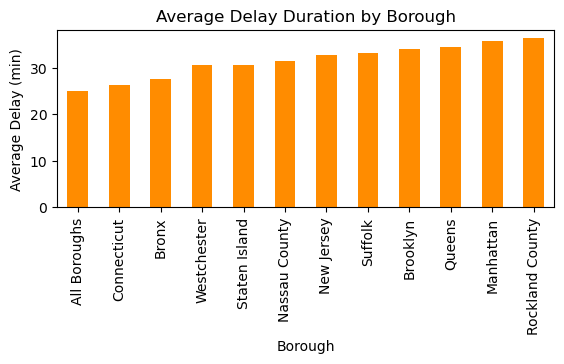

In [749]:
plt.figure(figsize=(6,4))
df.groupby('Boro')['Delay_Minutes'].mean().sort_values().plot(kind='bar', color='darkorange')
plt.title("Average Delay Duration by Borough")
plt.ylabel("Average Delay (min)")
plt.xlabel("Borough")
plt.tight_layout(pad=2.0)
plt.savefig("borough_delay.png", dpi=300, pad_inches=0.3)
plt.show()

In [750]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Boro', 'Reason', 'Run_Type']

label_encoders = {}

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021165 entries, 1 to 1219490
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   School_Year                      1021165 non-null  int64  
 1   Busbreakdown_ID                  1021165 non-null  int64  
 2   Run_Type                         1021165 non-null  int64  
 3   Bus_No                           1021165 non-null  object 
 4   Route_Number                     1021165 non-null  object 
 5   Reason                           1021165 non-null  int64  
 6   Schools_Serviced                 1021165 non-null  object 
 7   Occurred_On                      1021165 non-null  object 
 8   Created_On                       1021165 non-null  object 
 9   Boro                             1021165 non-null  int64  
 10  Bus_Company_Name                 1021165 non-null  object 
 11  How_Long_Delayed                 1021165 non-null  obje

In [753]:
df['Schools_Serviced'].head(50)

1                             22001
2                             11012
3                             15032
8                             11688
9                             19108
12                            19108
13                            30126
14                             X096
15                            28407
16                             C524
17                      12026,12067
18                            26177
19          01015,01063,01419,01461
20                      14450,14467
21                09015,09058,09458
22          20765,21099,21199,21424
23                      04410,04657
24                            22286
25                      31022,31072
26          20180,20192,20470,20488
27                             S491
28                      31044,31297
29                25053,25194,25294
30                            75407
31    17012,17191,17210,17354,17484
32                            02990
33                      19020,19464
34                19002,1907

In [754]:
df['Num_Schools_Serviced'] = df['Schools_Serviced'].astype(str).apply(lambda x: len(x.split(',')))
df['Is_Multi_School'] = df['Schools_Serviced'].astype(str).apply(lambda x: 1 if ',' in x else 0)
df['Primary_School'] = df['Schools_Serviced'].astype(str).apply(lambda x: sorted(x.split(','))[0].strip())

In [755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021165 entries, 1 to 1219490
Data columns (total 23 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   School_Year                      1021165 non-null  int64  
 1   Busbreakdown_ID                  1021165 non-null  int64  
 2   Run_Type                         1021165 non-null  int64  
 3   Bus_No                           1021165 non-null  object 
 4   Route_Number                     1021165 non-null  object 
 5   Reason                           1021165 non-null  int64  
 6   Schools_Serviced                 1021165 non-null  object 
 7   Occurred_On                      1021165 non-null  object 
 8   Created_On                       1021165 non-null  object 
 9   Boro                             1021165 non-null  int64  
 10  Bus_Company_Name                 1021165 non-null  object 
 11  How_Long_Delayed                 1021165 non-null  obje

In [758]:
non_numeric_mask = ~df['Primary_School'].astype(str).str.isnumeric()


In [759]:
unique_strings = df.loc[non_numeric_mask, 'Primary_School'].unique()
print(unique_strings)


['X096' 'C524' 'S491' ... 'C539' 'C352' 'S176A']


In [760]:
df.loc[non_numeric_mask, 'Primary_School'].value_counts().head(500)


Primary_School
C814                 3983
C457                 3419
C195                 3319
                     3051
C073                 3028
                     ... 
E206                    2
13463 13669             2
22446 22480 22663       2
C192                    2
14120 14450 14435       2
Name: count, Length: 500, dtype: int64

In [761]:
import pandas as pd

vc = df['Primary_School'].value_counts()

freq_df = vc.reset_index()
freq_df.columns = ['Primary_School', 'Count']
freq_df['Cumulative_Count'] = freq_df['Count'].cumsum()
freq_df['Cumulative_Percentage'] = 100 * freq_df['Cumulative_Count'] / freq_df['Count'].sum()


print(freq_df.head(20))

   Primary_School  Count  Cumulative_Count  Cumulative_Percentage
0           12084   5142              5142               0.503543
1           02655   4985             10127               0.991710
2           02930   4773             14900               1.459118
3            C814   3983             18883               1.849162
4           02699   3781             22664               2.219426
5           02909   3728             26392               2.584499
6           12486   3522             29914               2.929399
7           03004   3444             33358               3.266661
8            C457   3419             36777               3.601475
9            C195   3319             40096               3.926496
10          75907   3300             43396               4.249656
11          05079   3153             46549               4.558421
12          02986   3065             49614               4.858568
13                  3051             52665               5.157345
14        

In [762]:
# Check where cumulative percentage crosses 95%, 97%, etc.
cutoff_95 = freq_df[freq_df['Cumulative_Percentage'] <= 95].shape[0]
cutoff_97 = freq_df[freq_df['Cumulative_Percentage'] <= 97].shape[0]
cutoff_99 = freq_df[freq_df['Cumulative_Percentage'] <= 99].shape[0]

print(f"Values covering 95% of data: {cutoff_95}")
print(f"Values covering 97% of data: {cutoff_97}")
print(f"Values covering 99% of data: {cutoff_99}")

Values covering 95% of data: 2190
Values covering 97% of data: 2542
Values covering 99% of data: 3244


In [763]:
import numpy as np
import re

def fix_primary_school(val):
    if pd.isna(val):
        return np.nan

    val = str(val).strip()

    # 1️⃣ Drop unwanted text values
    drop_values = ['0', 'SELECT SCHOOL', 'MIN']
    if val.upper() in drop_values:
        return np.nan

    # 2️⃣ Extract first 5-digit numeric code if available
    match = re.search(r'\b\d{5}\b', val)
    if match:
        return match.group(0)

    # 3️⃣ Otherwise, return original (keep as-is)
    return val

# Apply cleaning
df['Primary_School_Cleaned'] = df['Primary_School'].apply(fix_primary_school)

# Optional: check results
print(df.loc[df['Primary_School'].isin(
    ['0', 'Select School', 'min', '02911 02930', '14459 and 14465',
     '02605 02310 02541 02545', '02698 02632', '03417 03163']),
    ['Primary_School', 'Primary_School_Cleaned']])


          Primary_School Primary_School_Cleaned
53937                  0                    NaN
53940                  0                    NaN
53941                  0                    NaN
79694                  0                    NaN
111594   14459 and 14465                  14459
...                  ...                    ...
1023515    Select School                    NaN
1026797    Select School                    NaN
1029338    Select School                    NaN
1086758                0                    NaN
1193138    Select School                    NaN

[148 rows x 2 columns]


In [765]:
# 1️⃣ Get value counts
counts = df['Primary_School_Cleaned'].value_counts()

# 2️⃣ Find all values that occur 10 or more times
valid_values = counts[counts >= 9].index

# 3️⃣ Keep only rows with those values
df = df[df['Primary_School_Cleaned'].isin(valid_values)].copy()

# 4️⃣ Optional — check how many rows were dropped
print("Remaining rows:", len(df))
print("Unique Primary_School_Cleaned values:", df['Primary_School_Cleaned'].nunique())


Remaining rows: 1016119
Unique Primary_School_Cleaned values: 3612


In [766]:
# Convert everything to string for safe checking
col = 'Primary_School_Cleaned'

# Find which entries are NOT purely numeric (contain letters or other characters)
mask_non_numeric = ~df[col].astype(str).str.fullmatch(r'\d+')

# Get unique string values among those
unique_strings = df.loc[mask_non_numeric, col].unique()



In [767]:
col = 'Primary_School_Cleaned'

# Filter only non-numeric (string) values
mask_non_numeric = ~df[col].astype(str).str.fullmatch(r'\d+')

# Show value counts for those string values
string_value_counts = df.loc[mask_non_numeric, col].value_counts()

# Display result
print(string_value_counts)


Primary_School_Cleaned
C814     3983
C457     3419
C195     3319
         3051
C073     3028
         ... 
S198B      10
S844       10
S145        9
S346        9
E230        9
Name: count, Length: 332, dtype: int64


In [770]:
df['Primary_School_Cleaned'].isnull().sum()

0

In [771]:
col = 'Primary_School_Cleaned'

# count strings that are empty or only whitespace
blank_mask = df[col].astype(str).str.strip() == ''
print("blank-like count:", blank_mask.sum())

# count exact empty string (if present)
print("exact '' count:", (df[col] == '').sum())

# count values that are only punctuation / non-word characters
punct_mask = df[col].astype(str).str.match(r'^[\W_]+$')
print("only-punctuation count:", punct_mask.sum())


blank-like count: 3051
exact '' count: 3051
only-punctuation count: 0


In [772]:
# first convert '' -> NaN (safe)
df['Primary_School_Cleaned'] = df['Primary_School_Cleaned'].replace('', pd.NA)

# drop rows where Primary_School_Cleaned is NA
df = df[df['Primary_School_Cleaned'].notna()].copy()

# verify
print("Remaining rows:", len(df))
print("Remaining unique Primary_School_Cleaned:", df['Primary_School_Cleaned'].nunique())


Remaining rows: 1013068
Remaining unique Primary_School_Cleaned: 3611


In [774]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Primary_School_Encoded'] = le.fit_transform(df['Primary_School_Cleaned'].astype(str))


In [777]:
df.drop(['Primary_School',
         'Primary_School_Cleaned',
         'Busbreakdown_ID',
         'How_Long_Delayed',
         'Created_On',
         'Last_Updated_On',
         'Schools_Serviced',
         'Breakdown_or_Running_Late'],
        axis=1, inplace=True)


In [779]:
# Columns to binary encode
binary_cols = [
    'Has_Contractor_Notified_Schools',
    'Has_Contractor_Notified_Parents',
    'Have_You_Alerted_OPT',
    'School_Age_or_PreK'
]

# Apply binary encoding
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1,
    'No': 0,
    'School-Age': 1,
    'Pre-K': 0
})


/var/folders/9v/cvqbc0p16l718bpl8kw22q680000gn/T/ipykernel_18121/3967180531.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013068 entries, 1 to 1219490
Data columns (total 17 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   School_Year                      1013068 non-null  int64  
 1   Run_Type                         1013068 non-null  int64  
 2   Bus_No                           1013068 non-null  object 
 3   Route_Number                     1013068 non-null  object 
 4   Reason                           1013068 non-null  int64  
 5   Occurred_On                      1013068 non-null  object 
 6   Boro                             1013068 non-null  int64  
 7   Bus_Company_Name                 1013068 non-null  object 
 8   Number_Of_Students_On_The_Bus    1013068 non-null  object 
 9   Has_Contractor_Notified_Schools  1013068 non-null  int64  
 10  Has_Contractor_Notified_Parents  1013068 non-null  int64  
 11  Have_You_Alerted_OPT             1013068 non-null  int6

In [781]:
df[['Occurred_On']].head()

,Occurred_On
1,01/10/2017 05:55:00 AM
2,05/11/2016 05:50:00 AM
3,01/05/2017 06:00:00 AM
8,02/06/2017 06:01:00 AM
9,05/02/2017 06:04:00 AM


In [782]:
# ensure it's in datetime format
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# create new features
df['DAY'] = df['Occurred_On'].dt.day
df['MONTH'] = df['Occurred_On'].dt.month
df['HOUR'] = df['Occurred_On'].dt.hour   
df['MINUTE'] = df['Occurred_On'].dt.minute


In [784]:
df = df.drop(columns=['Occurred_On'])


In [785]:
df[['Number_Of_Students_On_The_Bus']].value_counts()

Number_Of_Students_On_The_Bus
0                                574020
2                                 60992
1                                 57306
3                                 56202
4                                 48416
                                  ...  
2,154                                 1
2,150                                 1
2,144                                 1
2,126                                 1
992                                   1
Name: count, Length: 512, dtype: int64

In [786]:
df['Number_Of_Students_On_The_Bus'] = pd.to_numeric(df['Number_Of_Students_On_The_Bus'], errors='coerce')

df = df[df['Number_Of_Students_On_The_Bus'] <= 80]


In [788]:
df[['Number_Of_Students_On_The_Bus']].value_counts()

Number_Of_Students_On_The_Bus
0.0                              574020
2.0                               60992
1.0                               57306
3.0                               56202
4.0                               48416
                                  ...  
73.0                                  1
75.0                                  1
77.0                                  1
78.0                                  1
80.0                                  1
Name: count, Length: 78, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 1012509 entries, 1 to 1219490
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   School_Year                      1012509 non-null  int64  
 1   Run_Type                         1012509 non-null  int64  
 2   Bus_No                           1012509 non-null  object 
 3   Route_Number                     1012509 non-null  object 
 4   Reason                           1012509 non-null  int64  
 5   Boro                             1012509 non-null  int64  
 6   Bus_Company_Name                 1012509 non-null  object 
 7   Number_Of_Students_On_The_Bus    1012509 non-null  float64
 8   Has_Contractor_Notified_Schools  1012509 non-null  int64  
 9   Has_Contractor_Notified_Parents  1012509 non-null  int64  
 10  Have_You_Alerted_OPT             1012509 non-null  int64  
 11  School_Age_or_PreK               1012509 non-null  int6

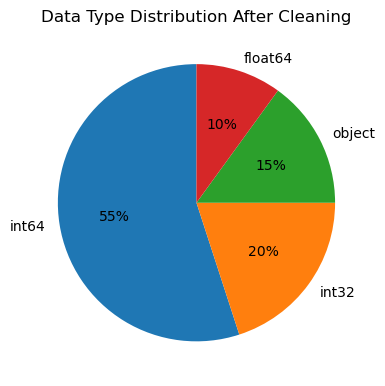

In [789]:
df.info()
dtype_counts = df.dtypes.value_counts()
plt.figure(figsize=(4,4))
plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.0f%%', startangle=90)
plt.title("Data Type Distribution After Cleaning")
plt.tight_layout()
plt.savefig("dtype_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [794]:
# Bus_Company_Name Cleaning Pipeline

In [795]:
# Initial Inspection
print(f"Total rows: {len(df):,}")
print(f"Null entries: {df['Bus_Company_Name'].isna().sum():,}")
print(f"Whitespace-only entries: {(df['Bus_Company_Name'].astype(str).str.strip() == '').sum():,}")
print(f"\nUnique company names before cleaning: {df['Bus_Company_Name'].nunique():,}")
print(df["Bus_Company_Name"].value_counts().head(10))

Total rows: 1,012,509
Null entries: 0
Whitespace-only entries: 0

Unique company names before cleaning: 590
Bus_Company_Name
LEESEL TRANSPORTATION CORP (B2192)    85694
AMBOY BUS COMPANY, INC                71875
PIONEER TRANSPORTATION CORP           60020
PRIDE TRANSPORTATION (SCH AGE)        52769
G.V.C., LTD.                          47019
BORO TRANSIT, INC.                    43848
HOYT TRANSPORTATION CORP.             39765
ALLIED TRANSIT CORP.                  32425
PIONEER TRANSPORTATION CO             27007
L & M BUS CORP.                       25480
Name: count, dtype: int64


In [796]:
def clean_bus_company_name(name):
    """Full cleaning pipeline for Bus_Company_Name."""
    if pd.isna(name):
        return np.nan

    name = str(name).upper().strip()

    # Remove parenthetical fragments
    # Handles codes '(B2192)' , (SCHOOL...)
    name = re.sub(r"\(.*?\)", "", name)   # remove complete parentheses
    name = re.sub(r"\(.*$", "", name)     # remove open-ended fragments
    name = re.sub(r"\[.*?\]", "", name)   # remove bracketed text if any

    # Remove punctuation, normalize spaces
    name = re.sub(r"[.,`'’]", "", name)
    name = re.sub(r"\s+", " ", name).strip()

    # Normalize corporate suffixes
    name = re.sub(r"\bINCORPORATED\b|\bINCORP\b|\bINC\Z|\bINC\b", "INC", name)
    name = re.sub(r"\bCORPORATION\b|\bCORP\Z|\bCORP\b", "CORP", name)
    name = re.sub(r"\bCOMPANY\b|\bCO\Z|\bCO\b", "CORP", name)
    name = re.sub(r"\bL\.L\.C\.|\bL L C\b|\bLLC\b", "LLC", name)

    # Clean up trailing words and whitespace
    name = re.sub(r"[^A-Z0-9& ]", "", name)
    name = re.sub(r"\s+", " ", name).strip()

    return name


In [797]:
df["Bus_Company_Name"] = df["Bus_Company_Name"].apply(clean_bus_company_name)


In [798]:
garbage_values = [
    "", "CON", "BUS CORP", "BUS CORP INC", "MR", "MS", "LH", "PL1800", "X214", "GVC"
]
df = df[~df["Bus_Company_Name"].isin(garbage_values)]


In [799]:
repair_map = {
    "ALL AMERICAN SCHOOL BUS C": "ALL AMERICAN SCHOOL BUS CORP",
    "EMPIRE CHARTER SERVICE IN": "EMPIRE CHARTER SERVICE INC",
    "MOUNTAINSIDE TRANSPORTATI": "MOUNTAINSIDE TRANSPORTATION",
    "FIRST STEPS TRANSP INC": "FIRST STEPS TRANSPORT INC",
    "FIRST STEPS TRANS": "FIRST STEPS TRANSPORT INC",
    "LEESEL TRANSP CORP": "LEESEL TRANSPORTATION CORP",
    "LEESEL TRANSPORTATION COR": "LEESEL TRANSPORTATION CORP",
    "RELIANT TRANS INC": "RELIANT TRANSPORTATION INC",
    "RELIANT TRANSPORTATION": "RELIANT TRANSPORTATION INC",
    "HAPPY CHILD TRANSPORTATIO": "HAPPY CHILD TRANSPORTATION",
    "MONTAUK STUDENT TRANS IN": "MONTAUK STUDENT TRANS INC",
    "MOUTSIDE": "MOUNTAINSIDE TRANSPORTATION",
    "ALTANTIC": "ATLANTIC EXPRESS",
    "ATALNTIC": "ATLANTIC EXPRESS",
    "ATLANTOC EXPRESS": "ATLANTIC EXPRESS",
    "ALTANTIC QUEENS": "ATLANTIC QUEENS BUS CORP",
    "ATLANTIC QNS": "ATLANTIC QUEENS BUS CORP",
    "AMBOY JAMIACA": "AMBOY BUS COMPANY",
    "AMBOY BRONX": "AMBOY BUS COMPANY",
    "AMBOY/RALPH AVENUE": "AMBOY BUS COMPANY",
    "AMBOY/BRONX": "AMBOY BUS COMPANY",
    "AMBOY -": "AMBOY BUS COMPANY",
    "AMBOY": "AMBOY BUS COMPANY",
    "AMBOY BUS COM": "AMBOY BUS COMPANY",
    "AMBOY BUS COMP": "AMBOY BUS COMPANY",
    "AMOBY": "AMBOY BUS COMPANY",
    "MAR CAN": "MAR-CAN TRANSPORT CORP INC",
    "MARCAN": "MAR-CAN TRANSPORT CORP INC",
    "GRANDPA BUS": "GRANDPA'S BUS CORP INC",
    "GRANPAS BUS": "GRANDPA'S BUS CORP INC",
    "GRANDPAS BUS": "GRANDPA'S BUS CORP INC",
    "GRANDPA": "GRANDPA'S BUS CORP INC",
    "GRANDPAS": "GRANDPA'S BUS CORP INC",
    "BOBBY'S BUS": "BOBBY'S BUS CORP INC",
    "BOBBYS": "BOBBY'S BUS CORP INC",
    "LITTLE RICHIE": "LITTLE RICHIE BUS SERVICE",
    "LITTILE RICHIE": "LITTLE RICHIE BUS SERVICE",
    "TTLE RICHIE": "LITTLE RICHIE BUS SERVICE",
    "LITTLE RICHIES": "LITTLE RICHIE BUS SERVICE",
    "PHILLIP BUS SERV": "PHILLIP BUS SERVICE INC",
    "PHILLIPSBUSSERVICE": "PHILLIP BUS SERVICE INC",
    "PHILLIPBUSSERVICE": "PHILLIP BUS SERVICE INC",
    "PHILLIP BUS SERVICE": "PHILLIP BUS SERVICE INC",
    "PHILLIPS BUS SERVICE": "PHILLIP BUS SERVICE INC",
    "PHILLIP BUS CORP": "PHILLIP BUS SERVICE INC",
    "MUTUAL BUS CORP": "MUTUAL BUS SERVICE INC",
    "RAINBOOW": "RAINBOW TRANSIT INC",
    "RAIMBOW": "RAINBOW TRANSIT INC",
    "RAINBPW": "RAINBOW TRANSIT INC",
    "LORISSA": "LORISSA BUS SERVICE INC",
    "LORINA BUS COPANY": "LORISSA BUS SERVICE INC",
    "LITTLE LINDA": "LITTLE LINDA BUS CORP INC",
    "LITTLE LISA": "LITTLE LISA BUS CORP INC",
    "LITTIE RICHIE BUS COPANY": "LITTLE RICHIE BUS SERVICE",
    "CONSOLIATED": "CONSOLIDATED BUS TRANSIT INC",
    "CONSIDLIDATED BUS CORP": "CONSOLIDATED BUS TRANSIT INC",
    "CONOLIDATED": "CONSOLIDATED BUS TRANSIT INC",
    "COSOLIDATED": "CONSOLIDATED BUS TRANSIT INC",
    "ALLIED": "ALLIED TRANSIT CORP",
    "ALLLIED": "ALLIED TRANSIT CORP",
    "ALLIEED": "ALLIED TRANSIT CORP",
    "ALIIED": "ALLIED TRANSIT CORP",
    "ALLIED BUS CORP": "ALLIED TRANSIT CORP",
    "ALLIED TRANSIT": "ALLIED TRANSIT CORP",
    "ALLIED TRANSIT BUS CORP": "ALLIED TRANSIT CORP",
    "LONERO TRANSIT": "LONERO TRANSIT INC",
    "EMPIRE": "EMPIRE STATE BUS CORP",
    "EMPIRE STATE": "EMPIRE STATE BUS CORP",
    "EMPITRE": "EMPIRE STATE BUS CORP",
    "EMPIRE BUS CORP": "EMPIRE STATE BUS CORP",
    "LOGAN BUS": "LOGAN BUS CORP INC",
    "LOGAN": "LOGAN BUS CORP INC",
    "LOGAN BUS CORP": "LOGAN BUS CORP INC",
    "LOGAN BUS COPAMY COM": "LOGAN BUS CORP INC",
    "LOGAN TRANSPRTATION": "LOGAN BUS CORP INC",
    "LOGAN TRANS SYST": "LOGAN BUS CORP INC",
    "MINIBUS": "MINIBUS SERVICE CORP",
    "MINI BUS": "MINIBUS SERVICE CORP",
    "MINI BUS CORP": "MINIBUS SERVICE CORP",
    "MINUS BUS": "MINIBUS SERVICE CORP",
    "MINUBUS": "MINIBUS SERVICE CORP",
    "MAR-CAN TRANSPORTATION": "MAR-CAN TRANSPORT CORP INC",
    "CARAVAN TRANSIT INC": "CARAVAN TRANSPORTATION INC",
    "CITYWIDE": "CITYWIDE TRANSIT INC",
    "CITY WIDE": "CITYWIDE TRANSIT INC",
    "CITIWIDE": "CITYWIDE TRANSIT INC",
    "CITYWIDE TRANSIT": "CITYWIDE TRANSIT INC",
    "CITYWIDE/RAINBOW": "CITYWIDE TRANSIT INC",
    "PIONEER": "PIONEER TRANSPORTATION CORP",
    "PIONEER TRANS": "PIONEER TRANSPORTATION CORP"
}

df["Bus_Company_Name"] = df["Bus_Company_Name"].replace(repair_map)


In [800]:
#Alias
df["Bus_Company_Name"] = df["Bus_Company_Name"].replace({
    "CAREFUL BUS": "CAREFUL BUS SERVICE INC",
    "PRIDE TRANSPORTATION": "PRIDE TRANSPORTATION INC"
})

In [801]:
print(f"\nUnique company names after cleaning: {df['Bus_Company_Name'].nunique():,}")
print(df["Bus_Company_Name"].value_counts().head(10))


Unique company names after cleaning: 265
Bus_Company_Name
LEESEL TRANSPORTATION CORP     111460
PIONEER TRANSPORTATION CORP     87034
AMBOY BUS CORP INC              71882
GVC LTD                         59651
PRIDE TRANSPORTATION INC        57501
L & M BUS CORP                  44009
BORO TRANSIT INC                43856
RELIANT TRANSPORTATION INC      43796
HOYT TRANSPORTATION CORP        39765
ALLIED TRANSIT CORP             32478
Name: count, dtype: int64


In [802]:
print(df['Bus_Company_Name'].unique())

['NEW DAWN TRANSIT LLC' 'DON THOMAS BUSES INC'
 'ALL AMERICAN SCHOOL BUS CORP' 'QUALITY TRANSPORTATION CORP'
 'LITTLE RICHIE BUS SERVICE' 'GVC LTD' 'VAN TRANS LLC'
 'PRIDE TRANSPORTATION INC' 'CAREFUL BUS SERVICE INC'
 'JOFAZ TRANSPORTATION INC' 'BORO TRANSIT INC' 'PHILLIP BUS SERVICE INC'
 'NYC SCHOOL BUS UMBRELLA SERVICES' 'PIONEER TRANSPORTATION CORP'
 'MARCAN TRANSPORT CORP INC' 'L & M BUS CORP' 'HOYT TRANSPORTATION CORP'
 'ALLIED TRANSIT CORP' 'LEESEL TRANSPORTATION CORP' 'SNT BUS INC'
 'LOGAN BUS CORP INC' 'GRANDPAS BUS CORP INC' 'Y & M TRANSIT CORP'
 'EMPIRE CHARTER SERVICE INC' 'EMPIRE STATE BUS CORP'
 'ALINA SERVICES CORP' 'LORINDA ENTERPRISES LTD'
 'CONSOLIDATED BUS TRANSIT INC' 'SMART PICK' 'IRIDIUM SERVICES CORP'
 'MJT BUS' 'THOMAS BUSES INC' 'RIMAR TRANSPORTATION'
 'LOGAN TRANSPORTATION SYSTEMS' 'CHILDRENS TRANS INC'
 'LITTLE LISA BUS CORP INC' 'BOBBYS BUS CORP INC'
 'LORISSA BUS SERVICE INC' 'LITTLE LINDA BUS COINC' 'ALL COUNTY BUS LLC'
 'FIRST STEPS' 'SELBY TRANSPORTATIO

In [803]:
len(repair_map)

90

In [804]:
# Label Encode 'Bus_Company_Name' for Tree/XGboost model
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform
df["Bus_Company_Name_Code"] = le.fit_transform(df["Bus_Company_Name"])

# Optional: inspect the mapping
company_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Encoded {len(company_map)} unique bus companies into numeric labels.")
print("Sample mapping (first 10):")
print(dict(list(company_map.items())[:10]))

Encoded 265 unique bus companies into numeric labels.
Sample mapping (first 10):
{'0000': 0, '21ST AVE': 1, 'ABLE': 2, 'ABLE BUS': 3, 'ABLE BUS CORP': 4, 'ABLE BUS INC': 5, 'ABLE US': 6, 'ACME BUS CORP': 7, 'ADDIES': 8, 'ADDIES BUS CORP': 9}


In [806]:
# Bus_No Cleaning Pipeline

In [808]:
# Basic overview
print(df[["Bus_No", "Route_Number"]].info())

# Sample unique values
print("\nSample Bus_No:", df["Bus_No"].dropna().unique()[:20])
print("\nSample Route_Number:", df["Route_Number"].dropna().unique()[:20])

<class 'pandas.core.frame.DataFrame'>
Index: 1012478 entries, 1 to 1219490
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Bus_No        1012478 non-null  object
 1   Route_Number  1012478 non-null  object
dtypes: object(2)
memory usage: 23.2+ MB
None

Sample Bus_No: ['4481' 'GT2114' '2436' 'GT 1479' '8008' '2430' '2500' '8618' '119'
 '24635' '26023' '101' '7500' '10443' '108' '1725' '3119' '306' '5311'
 '837']

Sample Route_Number: ['K002' 'Y925' 'K1546' 'Y749' 'K8423' 'K1980' 'Q9127' 'Q525' '2' 'X346'
 'Q266' 'N592' 'K051' 'X077' 'K931' 'M636' 'L544' 'R1247' 'K108' '03']


In [810]:
import re
import pandas as pd

# --- Clean Bus_No ---
def clean_bus_no(val):
    if pd.isna(val):
        return None
    val = str(val).strip().upper()
    val = re.sub(r"[^A-Z0-9]", "", val)  # keep only letters and numbers
    if val in ["NA", "NONE", "NAN", "NULL", "0", ""]:
        return None
    return val

# --- Clean Route_Number ---
def clean_route_number(val):
    if pd.isna(val):
        return None
    val = str(val).strip().upper()
    val = re.sub(r"[^A-Z0-9]", "", val)  # remove spaces, hyphens, parentheses
    if val == "":
        return None
    return val

# Apply cleaning
df["Bus_No"] = df["Bus_No"].apply(clean_bus_no)
df["Route_Number"] = df["Route_Number"].apply(clean_route_number)

# Inspect results
print("Unique Bus_No:", df["Bus_No"].nunique())
print("Unique Route_Number:", df["Route_Number"].nunique())

print("\nSample cleaned Bus_No:", df["Bus_No"].unique()[:20])
print("\nSample cleaned Route_Number:", df["Route_Number"].unique()[:20])

Unique Bus_No: 25975
Unique Route_Number: 19982

Sample cleaned Bus_No: ['4481' 'GT2114' '2436' 'GT1479' '8008' '2430' '2500' '8618' '119' '24635'
 '26023' '101' '7500' '10443' '108' '1725' '3119' '306' '5311' '837']

Sample cleaned Route_Number: ['K002' 'Y925' 'K1546' 'Y749' 'K8423' 'K1980' 'Q9127' 'Q525' '2' 'X346'
 'Q266' 'N592' 'K051' 'X077' 'K931' 'M636' 'L544' 'R1247' 'K108' '03']


In [812]:
import matplotlib.pyplot as plt

# Count how many unique routes each bus operates
routes_per_bus = df.groupby("Bus_No")["Route_Number"].nunique()

print("Summary statistics:")
print(routes_per_bus.describe())

Summary statistics:
count    25975.000000
mean        12.034995
std         20.864231
min          1.000000
25%          1.000000
50%          4.000000
75%         14.000000
max        970.000000
Name: Route_Number, dtype: float64


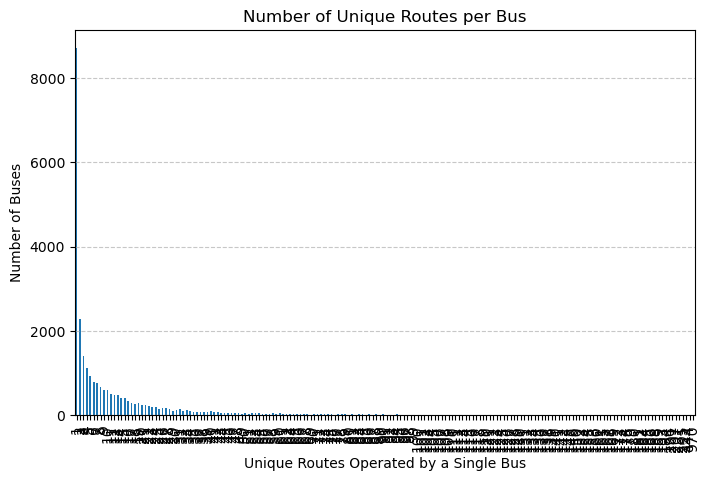

In [813]:
plt.figure(figsize=(8,5))
routes_per_bus.value_counts().sort_index().plot(kind="bar")
plt.title("Number of Unique Routes per Bus")
plt.xlabel("Unique Routes Operated by a Single Bus")
plt.ylabel("Number of Buses")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

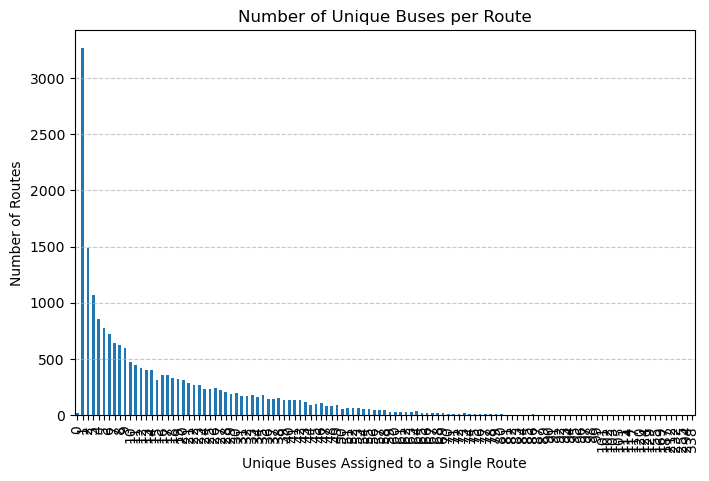

In [831]:
buses_per_route = df.groupby("Route_Number")["Bus_No"].nunique()

plt.figure(figsize=(8,5))
buses_per_route.value_counts().sort_index().plot(kind="bar")
plt.title("Number of Unique Buses per Route")
plt.xlabel("Unique Buses Assigned to a Single Route")
plt.ylabel("Number of Routes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### We applied Frequency Encoding to 'Bus_No' and 'Route_Number' because both have high cardinality
### and a many-to-many relationship (each bus can serve multiple routes and each route can have multiple buses).
### Frequency Encoding converts each category into its occurrence proportion in the dataset,
### preserving useful information while keeping the representation compact and model-friendly.

In [835]:
# Frequency encoding for Bus_No and Route_Number
for col in ["Bus_No", "Route_Number"]:
    freq = df[col].value_counts(normalize=True)  # relative frequency
    df[col + "_FreqEnc"] = df[col].map(freq)

# Inspect results
print(df[["Bus_No", "Bus_No_FreqEnc", "Route_Number", "Route_Number_FreqEnc"]].head(10))

    Bus_No  Bus_No_FreqEnc Route_Number  Route_Number_FreqEnc
1     4481        0.000050         K002              0.000416
2   GT2114        0.000008         Y925              0.000130
3     2436        0.000044        K1546              0.000041
8   GT1479        0.000110         Y749              0.000100
9     8008        0.000353        K8423              0.000010
12    2430        0.000073        K1980              0.000048
13    2500        0.000164        Q9127              0.000004
15    8618        0.000015         Q525              0.000060
16     119        0.000489            2              0.006476
17   24635        0.000205         X346              0.000160


In [846]:
df = df.drop(columns=['Bus_No', 'Route_Number', 'Bus_Company_Name' ])

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012478 entries, 1 to 1219490
Data columns (total 23 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   School_Year                      1012478 non-null  int64  
 1   Run_Type                         1012478 non-null  int64  
 2   Bus_No                           1010568 non-null  object 
 3   Route_Number                     1012477 non-null  object 
 4   Reason                           1012478 non-null  int64  
 5   Boro                             1012478 non-null  int64  
 6   Bus_Company_Name                 1012478 non-null  object 
 7   Number_Of_Students_On_The_Bus    1012478 non-null  float64
 8   Has_Contractor_Notified_Schools  1012478 non-null  int64  
 9   Has_Contractor_Notified_Parents  1012478 non-null  int64  
 10  Have_You_Alerted_OPT             1012478 non-null  int64  
 11  School_Age_or_PreK               1012478 non-null  int6

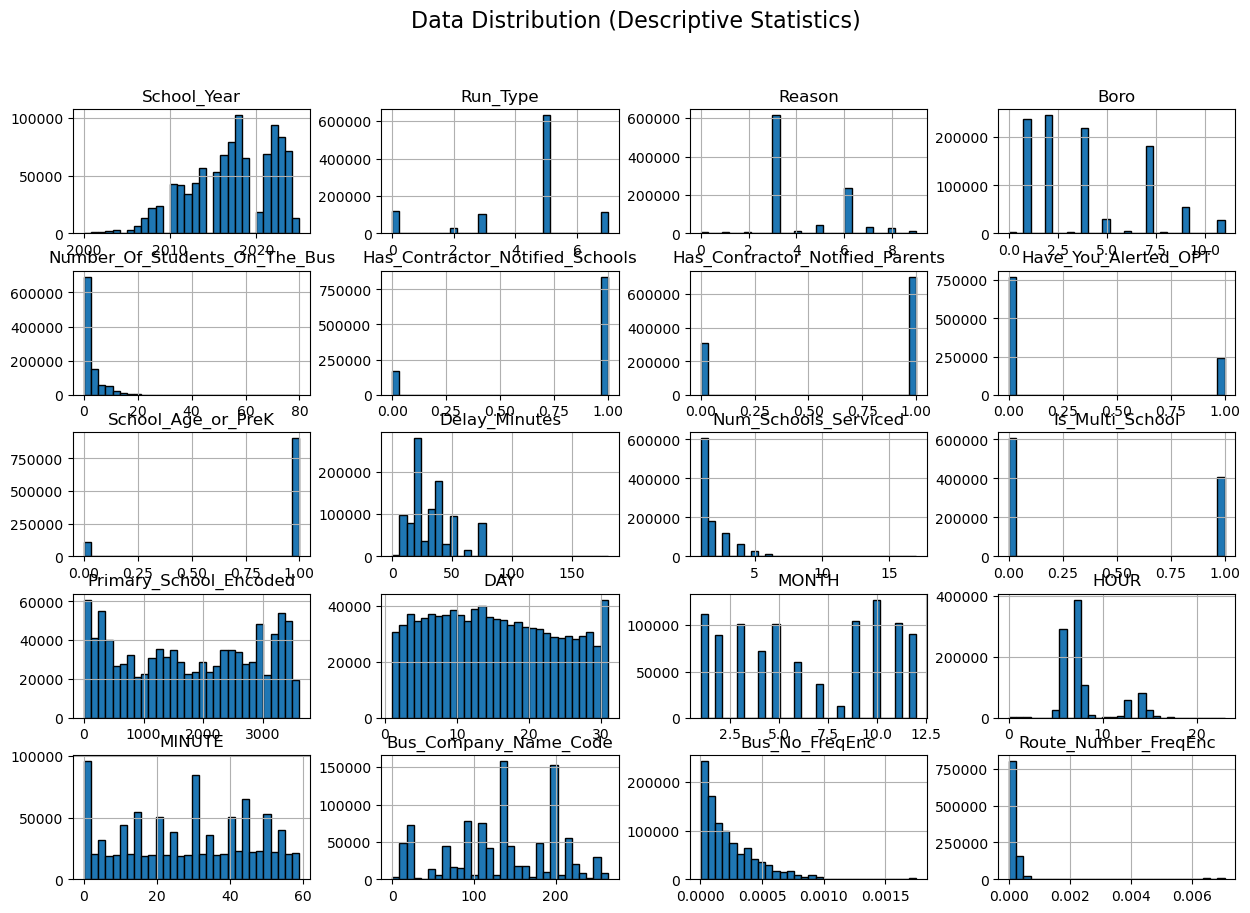

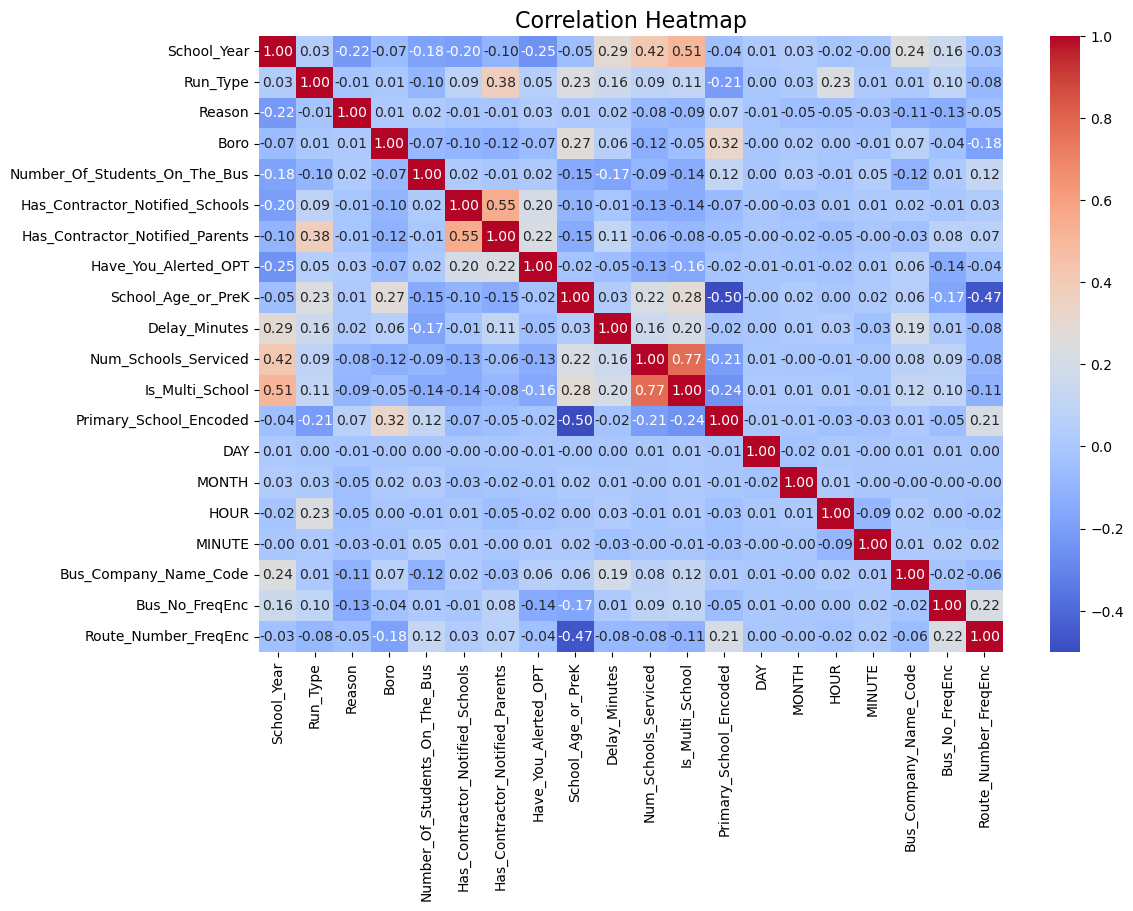

In [677]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Data Distribution (Descriptive Statistics)
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Data Distribution (Descriptive Statistics)', fontsize=16)
plt.savefig('Data Distribution.png')
plt.show()

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.savefig('Heatmap.png')
plt.show()


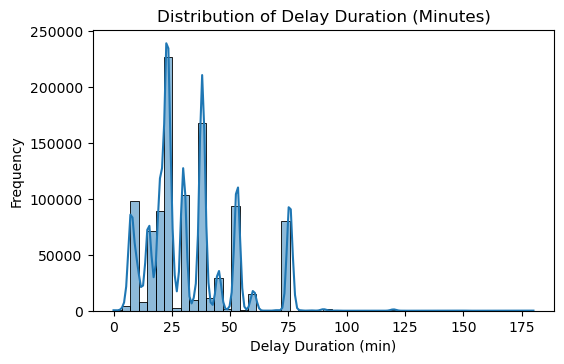

In [678]:
plt.figure(figsize=(6,4))
sns.histplot(df['Delay_Minutes'], bins=50, kde=True)
plt.title("Distribution of Delay Duration (Minutes)")
plt.xlabel("Delay Duration (min)")
plt.ylabel("Frequency")
plt.tight_layout(pad=2.0)
plt.savefig("delay_distribution.png", dpi=300, pad_inches=0.3)
plt.show()

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012478 entries, 1 to 1219490
Data columns (total 23 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   School_Year                      1012478 non-null  int64  
 1   Run_Type                         1012478 non-null  int64  
 2   Bus_No                           1010568 non-null  object 
 3   Route_Number                     1012477 non-null  object 
 4   Reason                           1012478 non-null  int64  
 5   Boro                             1012478 non-null  int64  
 6   Bus_Company_Name                 1012478 non-null  object 
 7   Number_Of_Students_On_The_Bus    1012478 non-null  float64
 8   Has_Contractor_Notified_Schools  1012478 non-null  int64  
 9   Has_Contractor_Notified_Parents  1012478 non-null  int64  
 10  Have_You_Alerted_OPT             1012478 non-null  int64  
 11  School_Age_or_PreK               1012478 non-null  int6

## Modeling: Linear Baseline vs Tree-Based Models
We establish a linear regression baseline and compare it with tree-based models on the cleaned dataset.


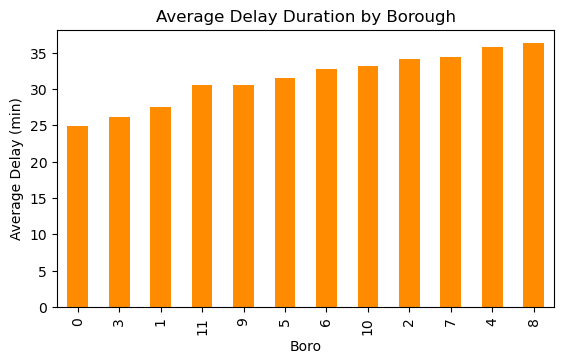

In [684]:
plt.figure(figsize=(6,4))
df.groupby('Boro')['Delay_Minutes'].mean().sort_values().plot(kind='bar', color='darkorange')
plt.title("Average Delay Duration by Borough")
plt.ylabel("Average Delay (min)")
plt.tight_layout(pad=2.0)
plt.savefig("borough_delay.png", dpi=300, pad_inches=0.3)
plt.show()

In [686]:
from sklearn.model_selection import train_test_split

target_col = 'Delay_Minutes'
if target_col not in df.columns:
    raise KeyError('Delay_Minutes column missing; run the preprocessing cells first.')

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
feature_cols = [col for col in numeric_cols if col != target_col]
if not feature_cols:
    raise ValueError('No numeric features available after preprocessing.')

model_df = df[feature_cols + [target_col]].copy()
max_rows = 150000
if len(model_df) > max_rows:
    model_df = model_df.sample(n=max_rows, random_state=42)
    print(f'Dataset larger than {max_rows:,}; downsampling for quicker training.')

X = model_df[feature_cols].fillna(model_df[feature_cols].median()).astype('float32')
y = model_df[target_col].fillna(model_df[target_col].median()).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Using {len(model_df):,} rows and {len(feature_cols)} features after preprocessing.')


Dataset larger than 150,000; downsampling for quicker training.
Using 150,000 rows and 19 features after preprocessing.


In [688]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [692]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

results = []

def evaluate(name, estimator):
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(((y_test - preds) ** 2).mean())
    r2 = r2_score(y_test, preds)
    results.append({
        'model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

linear_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
evaluate('LinearRegression', linear_baseline)

tree_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
evaluate('RandomForest', tree_model)

try:
    from xgboost import XGBRegressor
    xgb_model = XGBRegressor(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        n_jobs=-1,
        random_state=42,
        tree_method='hist'
    )
    evaluate('XGBRegressor', xgb_model)
except ImportError:
    print('xgboost not installed; skipping XGBRegressor. Install xgboost to include it.')

results_df = pd.DataFrame(results).set_index('model').sort_values(by='RMSE')
display(results_df.style.format({'MAE': '{:.2f}', 'RMSE': '{:.2f}', 'R2': '{:.3f}'}))

if 'LinearRegression' in results_df.index and len(results_df) > 1:
    baseline_rmse = results_df.loc['LinearRegression', 'RMSE']
    for model_name, row in results_df.iterrows():
        if model_name == 'LinearRegression':
            continue
        improvement = baseline_rmse - row['RMSE']
        print(f"{model_name} improves RMSE by {improvement:.2f} minutes compared with the linear baseline.")


,MAE,RMSE,R2
model,,,
RandomForest,6.83,10.22,0.688
XGBRegressor,7.26,10.37,0.679
LinearRegression,12.82,16.75,0.162


RandomForest improves RMSE by 6.53 minutes compared with the linear baseline.
XGBRegressor improves RMSE by 6.37 minutes compared with the linear baseline.


In [694]:
df = df.drop(columns=['Bus_No','Route_Number','Bus_Company_Name'])

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012478 entries, 1 to 1219490
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   School_Year                      1012478 non-null  int64  
 1   Run_Type                         1012478 non-null  int64  
 2   Reason                           1012478 non-null  int64  
 3   Boro                             1012478 non-null  int64  
 4   Number_Of_Students_On_The_Bus    1012478 non-null  float64
 5   Has_Contractor_Notified_Schools  1012478 non-null  int64  
 6   Has_Contractor_Notified_Parents  1012478 non-null  int64  
 7   Have_You_Alerted_OPT             1012478 non-null  int64  
 8   School_Age_or_PreK               1012478 non-null  int64  
 9   Delay_Minutes                    1012478 non-null  float64
 10  Num_Schools_Serviced             1012478 non-null  int64  
 11  Is_Multi_School                  1012478 non-null  int6

In [451]:
def classify_delay(x):
    if x <= 20:
        return 0    # Low
    elif x <= 45:
        return 1    # Moderate
    else:
        return 2    # High

df['Delay_Class'] = df['Delay_Minutes'].apply(classify_delay)


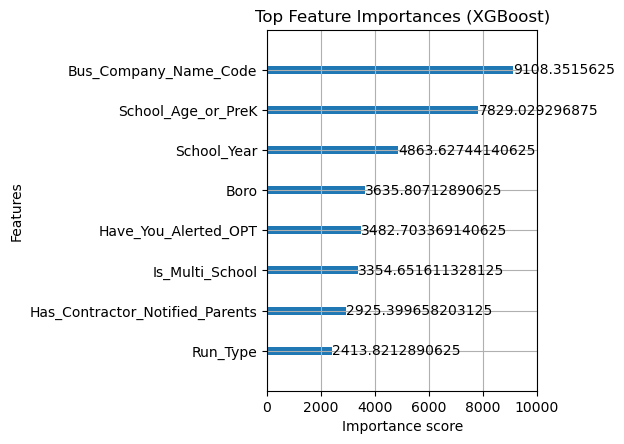

In [453]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model, max_num_features=8, importance_type='gain')
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout(pad=2.0)
plt.savefig("feature_importance.png", dpi=300, pad_inches=0.3)
plt.show()

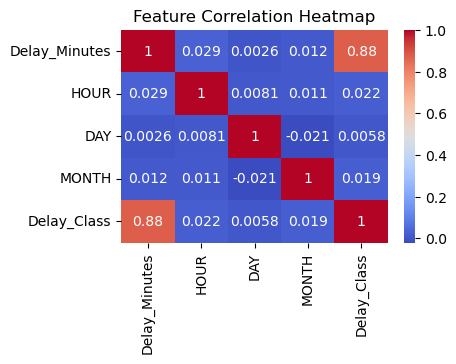

In [456]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(df[['Delay_Minutes','HOUR','DAY','MONTH','Delay_Class']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout(pad=2.0)
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight', pad_inches=0.3)
plt.show()

In [464]:
df = df.dropna(subset=['Bus_No_FreqEnc', 'Route_Number_FreqEnc'])

In [466]:
X = df.drop(columns=['Delay_Class', 'Delay_Minutes'])   # features
y = df['Delay_Class']                                   # target


In [468]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [469]:
from sklearn.linear_model import LogisticRegression

# Create the model (increase max_iter for convergence on larger data)
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)

# Train the model
model.fit(X_train, y_train)


/Users/sahilanjum/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [471]:
y_pred = model.predict(X_test)

In [472]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5428767923053326

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.07      0.12     54025
           1       0.55      0.95      0.70    109584
           2       0.35      0.05      0.09     38505

    accuracy                           0.54    202114
   macro avg       0.47      0.36      0.30    202114
weighted avg       0.50      0.54      0.43    202114


Confusion Matrix:
 [[  3757  48906   1362]
 [  3297 103967   2320]
 [   366  36140   1999]]


In [473]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(importance.head(10))


                            Feature  Coefficient
4     Number_Of_Students_On_The_Bus     0.056173
5   Has_Contractor_Notified_Schools     0.050284
7              Have_You_Alerted_OPT     0.031344
8                School_Age_or_PreK     0.016035
14                             HOUR     0.015727
15                           MINUTE     0.003248
0                       School_Year     0.000498
18             Route_Number_FreqEnc     0.000032
17                   Bus_No_FreqEnc    -0.000020
11           Primary_School_Encoded    -0.000053


In [474]:
# 1) Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

# 2) Prepare features and target (assumes Delay_Class is numeric: 0,1,2)
X = df.drop(columns=['Delay_Class'])
y = df['Delay_Class']

# 3) Train / Validation / Test split
# First split train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Then split train and validation from train+val
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval
)

# 4) Create and train XGBoost classifier
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(y.unique()),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Use eval_set and early stopping to avoid overfitting
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=50
)

# 5) Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # if you need probabilities

# 6) Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7) Feature importance (optional)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop features:\n", importance_df.head(10))

# 8) Save model
joblib.dump(model, 'xgb_delay_model.joblib')


[0]	validation_0-mlogloss:1.02504


/Users/sahilanjum/Anaconda/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:53:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[50]	validation_0-mlogloss:0.09201
[100]	validation_0-mlogloss:0.01066
[150]	validation_0-mlogloss:0.00144
[200]	validation_0-mlogloss:0.00018
[250]	validation_0-mlogloss:0.00003
[300]	validation_0-mlogloss:0.00001
[350]	validation_0-mlogloss:0.00000
[400]	validation_0-mlogloss:0.00000
[450]	validation_0-mlogloss:0.00000
[499]	validation_0-mlogloss:0.00000
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     54025
           1       1.00      1.00      1.00    109584
           2       1.00      1.00      1.00     38505

    accuracy                           1.00    202114
   macro avg       1.00      1.00      1.00    202114
weighted avg       1.00      1.00      1.00    202114


Confusion Matrix:
 [[ 54025      0      0]
 [     0 109584      0]
 [     0      0  38505]]

Top features:
                           feature  importance
9                   Delay_Minutes    0.878197
8              Schoo

['xgb_delay_model.joblib']

In [475]:

# Linear regression baseline
# choose feature columns (adjust if you have a prepared list)
# e.g., X = df[feature_cols] where feature_cols is the same list you used for modeling
# If you have a variable 'feature_cols' from notebook, use it. Otherwise use all numeric cols except targets.
feature_cols = [c for c in df.columns if df[c].dtype in [np.int64, np.float64] and c not in ['Delay_Minutes', 'Delay_Class']]
X = df[feature_cols].copy()

y_reg = df['Delay_Minutes']
y_clf = df['Delay_Class']

# Train-test split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)
lr = LinearRegression()
t0 = time.time()
lr.fit(X_train, y_reg_train)
t1 = time.time()

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_reg_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_reg_test, y_pred_lr))
r2_lr = r2_score(y_reg_test, y_pred_lr)

print("LinearRegression: time(s)={:.2f}, MAE={:.3f}, RMSE={:.3f}, R2={:.3f}".format(t1-t0, mae_lr, rmse_lr, r2_lr))
# Predicted vs Actual
plt.figure(figsize=(6,4))
plt.scatter(y_reg_test, y_pred_lr, alpha=0.3, s=10)
plt.plot([0, max(y_reg_test.max(), y_pred_lr.max())], [0, max(y_reg_test.max(), y_pred_lr.max())], 'r--')
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout(pad=2.0)
plt.savefig("reg_actual_vs_pred_lr.png", dpi=300, pad_inches=0.3)
plt.show()

# Residuals histogram
res_lr = y_reg_test - y_pred_lr
plt.figure(figsize=(6,3))
sns.histplot(res_lr, bins=50, kde=True)
plt.xlabel("Residual = Actual - Predicted (min)")
plt.title("Residuals Distribution (Linear Regression)")
plt.tight_layout(pad=2.0)
plt.savefig("reg_residuals_lr.png", dpi=300, pad_inches=0.3)
plt.show()

NameError: name 'time' is not defined

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6, n_jobs=-1, verbosity=0)

t0 = time.time()
xgb_reg.fit(X_train, y_reg_train)
t1 = time.time()

y_pred_xgb = xgb_reg.predict(X_test)

mae_xgb = mean_absolute_error(y_reg_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_reg_test, y_pred_xgb))
r2_xgb = r2_score(y_reg_test, y_pred_xgb)

print("XGBRegressor: time(s)={:.2f}, MAE={:.3f}, RMSE={:.3f}, R2={:.3f}".format(t1-t0, mae_xgb, rmse_xgb, r2_xgb))
plt.figure(figsize=(6,4))
plt.scatter(y_reg_test, y_pred_xgb, alpha=0.3, s=10)
plt.plot([0, max(y_reg_test.max(), y_pred_xgb.max())], [0, max(y_reg_test.max(), y_pred_xgb.max())], 'r--')
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("XGBoost: Actual vs Predicted (Regression)")
plt.tight_layout(pad=2.0)
plt.savefig("reg_actual_vs_pred_xgb.png", dpi=300, pad_inches=0.3)
plt.show()

res_xgb = y_reg_test - y_pred_xgb
plt.figure(figsize=(6,3))
sns.histplot(res_xgb, bins=50, kde=True)
plt.xlabel("Residual = Actual - Predicted (min)")
plt.title("Residuals Distribution (XGBoost)")
plt.tight_layout(pad=2.0)
plt.savefig("reg_residuals_xgb.png", dpi=300, pad_inches=0.3)
plt.show()

In [ ]:
# Convert delay duration into 3 categories: Low, Moderate, High
df['Delay_Class'] = pd.cut(
    df['Delay_Minutes'],           # numeric delay duration
    bins=[-1, 20, 45, df['Delay_Minutes'].max()],  # ranges
    labels=[0, 1, 2]               # 0=Low, 1=Moderate, 2=High
).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

# Features for classification
X = df.drop(columns=['Delay_Minutes', 'Delay_Class'])

# Target variable for classification
y_class = df['Delay_Class']

# Split into train and test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression (baseline)
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train_clf, y_train_clf)
y_pred_lr_clf = lr_clf.predict(X_test_clf)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test_clf, y_pred_lr_clf):.3f}")

# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb_clf = xgb_clf.predict(X_test_clf)

print(f"XGBoostClassifier Accuracy: {accuracy_score(y_test_clf, y_pred_xgb_clf):.3f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test_clf, y_pred_xgb_clf))
cm = confusion_matrix(y_test_clf, y_pred_xgb_clf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.tight_layout(pad=2.0)
plt.savefig("clf_confusion_matrix_xgb.png", dpi=300, pad_inches=0.3)
plt.show()

In [ ]:
cm = confusion_matrix(y_test_clf, y_pred_xgb_clf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.tight_layout(pad=2.0)
plt.savefig("clf_confusion_matrix_xgb.png", dpi=300, pad_inches=0.3)
plt.show()